<b> I developed a Multiple Linear Regression model to predict students' Performance Index based on various influencing factors using real-world-style data. </b>

# 📌 Project Objective:
To predict the performance of students using input features such as:

Hours Studied

Previous Scores

Extracurricular Activities

Sleep Hours

Number of Sample Papers Practiced

# 📊 Tools & Technologies:

Python

Pandas, NumPy for data handling

Matplotlib & Seaborn for data visualization

Scikit-learn for model building and evaluation

# 📷 Key Visualizations & Insights:

✅ Scatter plots helped observe linear relationships between inputs and the target

📦 Box plots were used to detect and visualize outliers

🔍 Actual vs Predicted comparison validated the model’s consistency

# 🧠 Model Details:

Model Type: Multiple Linear Regression

Features Used: Hours Studied, Previous Scores

Target Variable: Performance Index

Data Split: 80% training, 20% testing

Model Trained and Evaluated Using R² Score

# 📈 Model Performance:

✅ Training R² Score: 98.58%

✅ Testing R² Score: 98.57%

💡 Indicates strong predictive power with minimal overfitting

🔻 Mean Absolute Error: 1.82

📉 RMSE: 2.30

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from csv file by using Pandas
df = pd.read_csv("Student_Performance.csv")
df.head(20)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [2]:
# get the data frame infromation by using Pandas info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [3]:
# get all the statistical information such as count, mean, median, standerd deviation, 25%, 50%,....etc. by using Pandas describe() function
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [4]:
# Convert categorical values into numerical format using the sklearn library.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Extracurricular Activities"] = le.fit_transform(df["Extracurricular Activities"])
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


<Axes: >

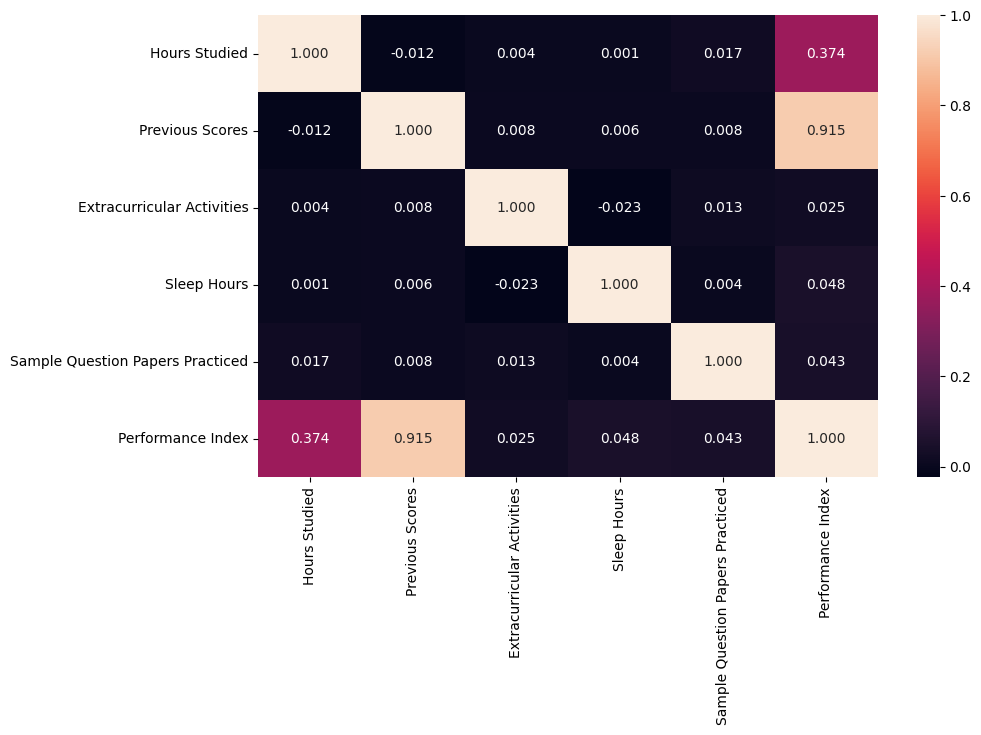

In [5]:
# Visualize the hash map to identify correlations between the features.
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".3f")

In [6]:
columns = df.keys()
columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

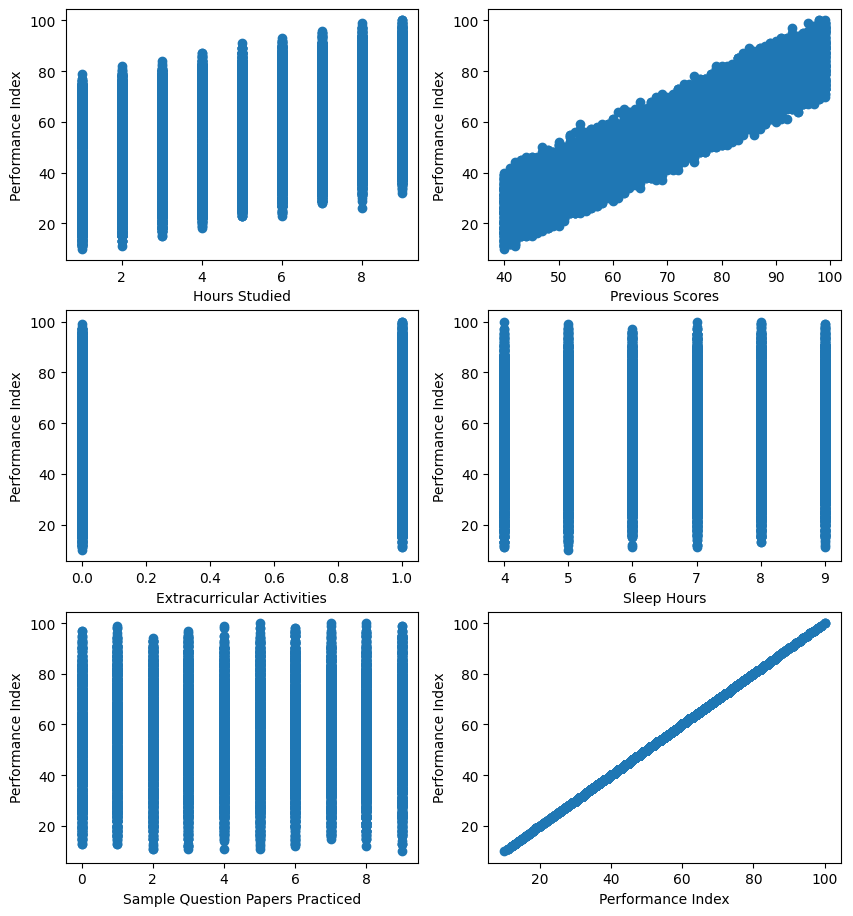

In [7]:
# Draw a scatter plot to observe the linear relationship between the variables
p1 = 1
plt.figure(figsize=(10, 15))
for i in columns:
    plt.subplot(4,2,p1).scatter(df[i], df['Performance Index'])
    plt.xlabel(i)
    plt.ylabel('Performance Index')
    p1 += 1
plt.show()

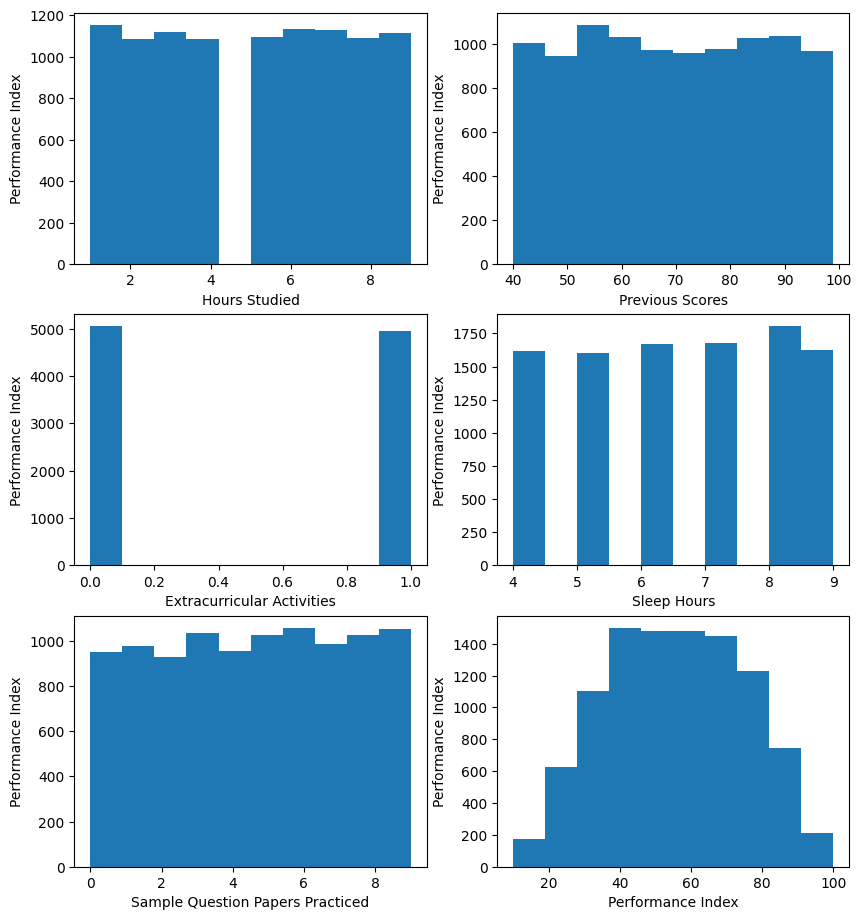

In [8]:
# Generate a histogram to visually check if the data follows a normal distribution.
p1 = 1
plt.figure(figsize=(10, 15))
for i in columns:
    plt.subplot(4,2,p1).hist(df[i])
    plt.xlabel(i)
    plt.ylabel('Performance Index')
    p1 += 1
plt.show()

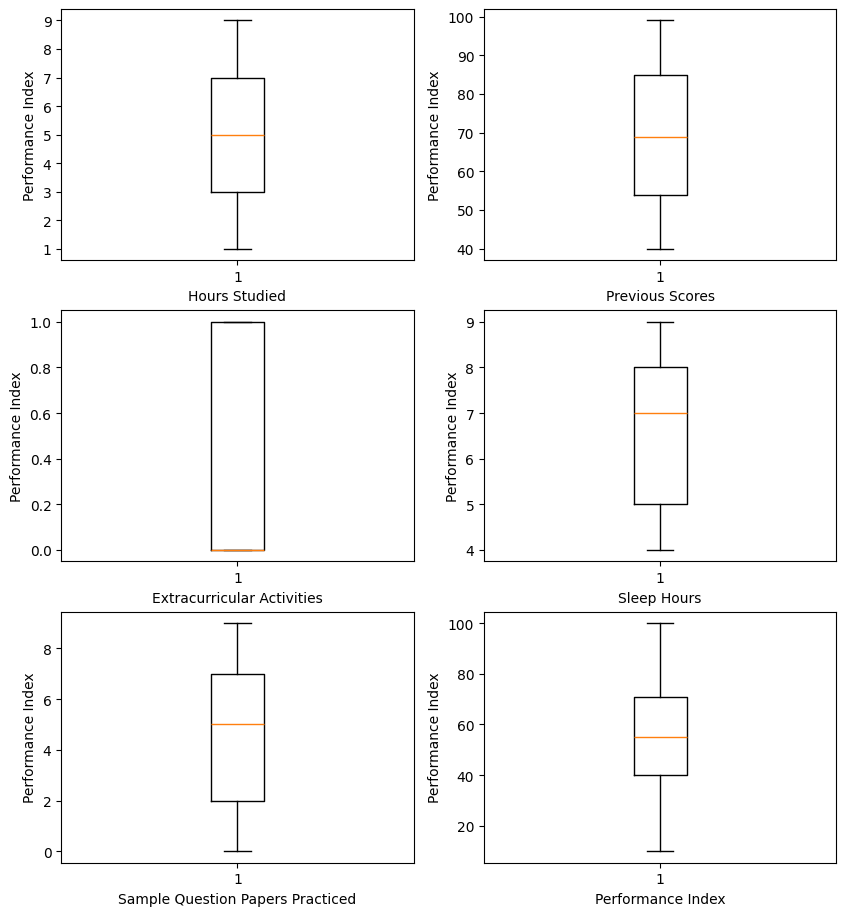

In [9]:
# Draw a boxplot to detect the presence of outliers in the data
p1 = 1
plt.figure(figsize=(10, 15))
for i in columns:
    plt.subplot(4,2,p1).boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel('Performance Index')
    p1 += 1
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Independent Features are --> 'Hours Studied', 'Previous Scores'
# Dependent Feature is --> "Performance Index"

# Split the dataset into two parts: 80% for training and 20% for testing.
x_train, x_test, y_train, y_test = train_test_split(df[['Hours Studied', 'Previous Scores']], df["Performance Index"], test_size=0.2, random_state=10)

# Build a Linear Regression Model
reg = LinearRegression()

# Fit the Linear Regression model with the training data
reg.fit(x_train, y_train)

# Calculate and return the R² score on the training data
reg.score(x_train, y_train)

0.9858858225512406

In [17]:
# Generate predicted values using the test data.
y_prediction = reg.predict(x_test)

# Calculate the Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R² Score for model evaluation."
mean_absolute_error = mean_absolute_error(y_test, y_prediction)
mean_squared_error = mean_squared_error(y_test, y_prediction)
root_mean_squared_error = np.sqrt(mean_squared_error)
r2_score = r2_score(y_test, y_prediction)

# Print all evaluation error metrics
print("mean_absolute_error", mean_absolute_error)
print("mean_squared_error", mean_squared_error)
print("root_mean_squared_error", root_mean_squared_error)
print("r2_score", r2_score)

mean_absolute_error 1.8290464120653498
mean_squared_error 5.304374418458831
root_mean_squared_error 2.303122753667036
r2_score 0.9857929448973036


In [12]:
# Construct a DataFrame to visualize and analyze the difference between actual and predicted values.
x_test["Actual Values"] = y_test
x_test["Predicted Values"] = y_prediction
x_test.head(10)

,Hours Studied,Previous Scores,Actual Values,Predicted Values
937,1,67,38.0,41.316214
9355,5,41,27.0,26.263865
2293,2,59,30.0,36.024510
192,7,58,49.0,49.310022
8675,3,58,39.0,37.866350
53,6,62,52.0,50.525415
9596,1,44,21.0,17.877426
265,5,68,52.0,53.778964
984,8,61,53.0,55.228174
9793,4,57,40.0,39.708190
